In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt

import sys

sys.path.append("./../app")
import nordpool

In [2]:
from datetime import datetime

prices = nordpool.fetch_nordpool_data("SE3")
prices

array([19.35, 18.73, 16.58, 14.49, 15.25, 15.62, 15.56, 16.01, 16.92,
       17.57, 18.2 , 18.9 , 20.98, 21.46, 20.96, 19.94, 18.24, 13.38,
       16.34, 17.19, 17.39, 18.94, 20.55, 19.54, 18.35, 18.81, 17.69,
       16.77])

In [3]:
no_of_variables = len(prices)

bounds = [(-0.5, 0.5)] * no_of_variables

# Lower temperature limits
A_ub = -1 * np.tri(no_of_variables)
b_ub = 19 - np.array([17] * no_of_variables)
b_ub[-1] = 0

A_ub = np.concatenate([A_ub, np.tri(no_of_variables)])
b_ub = np.concatenate([b_ub, -1 * (19 - np.array([22] * no_of_variables))])
b_ub[-1] = 0

print(A_ub)
print(b_ub)


res = linprog(prices, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print(res)

[[-1. -0. -0. ... -0. -0. -0.]
 [-1. -1. -0. ... -0. -0. -0.]
 [-1. -1. -1. ... -0. -0. -0.]
 ...
 [ 1.  1.  1. ...  1.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0]
           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -23.09499999999999
       ineqlin:  marginals: array([ -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,
        -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,
        -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,
        -0.  ,  -0.  ,  -0.  , -17.69,  -0.  ,  -0.  ,  -0.  ,  -0.  ,
        -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,
        -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,
        -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  ,  -0.  , 

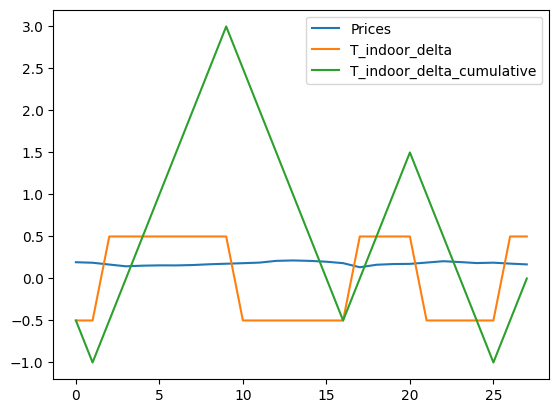

In [4]:
plt.plot(prices / 100, label="Prices")
plt.plot(res.x, label="T_indoor_delta")
plt.plot(res.x.cumsum(), label="T_indoor_delta_cumulative")
plt.legend()